In [14]:
import sys
sys.path.append('..')
from matplotlib import pyplot as plt
import numpy as np
from src.optimization_src.knot_opti import KnotOpti
from src.geometry_src.rolliness import rolliness
from src.figures_src.figures import color1, color2, color3

In [15]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# utils
plot_name = lambda i, x: f'figure_{i}_{x}.png'
plot_name_pdf = lambda i, x: f'figure_{i}_{x}.pdf'

first_nonzero_digits = lambda x: str(x)[2:]

In [17]:
fontsize = 14
plt.rcParams.update({'font.size': fontsize, 'text.usetex': True, 'font.family': 'serif'})

# Figure 1

In [18]:
# load data
path = '../data/blender_plots'
a = 0.9
a_str = first_nonzero_digits(a)
fig_1_name = lambda x: plot_name(1, f'{a_str}_3_{x}')
img = plt.imread(f'{path}/{fig_1_name("plane")}')

name = 'KNOT_a_9_p_3_n_1k_wtdr_7.00e-02_wcurv_1.00e+03_tdr2'
ko = KnotOpti.parse_name(name)
base = ko.load("base")
stretched = ko.load("stretched")
projected = ko.load("projected")


In [19]:
rhos_heights = [rolliness(knot) for knot in [base, stretched, projected]]
rhos = [rho for rho, _ in rhos_heights]
heights = [height for _, height in rhos_heights]

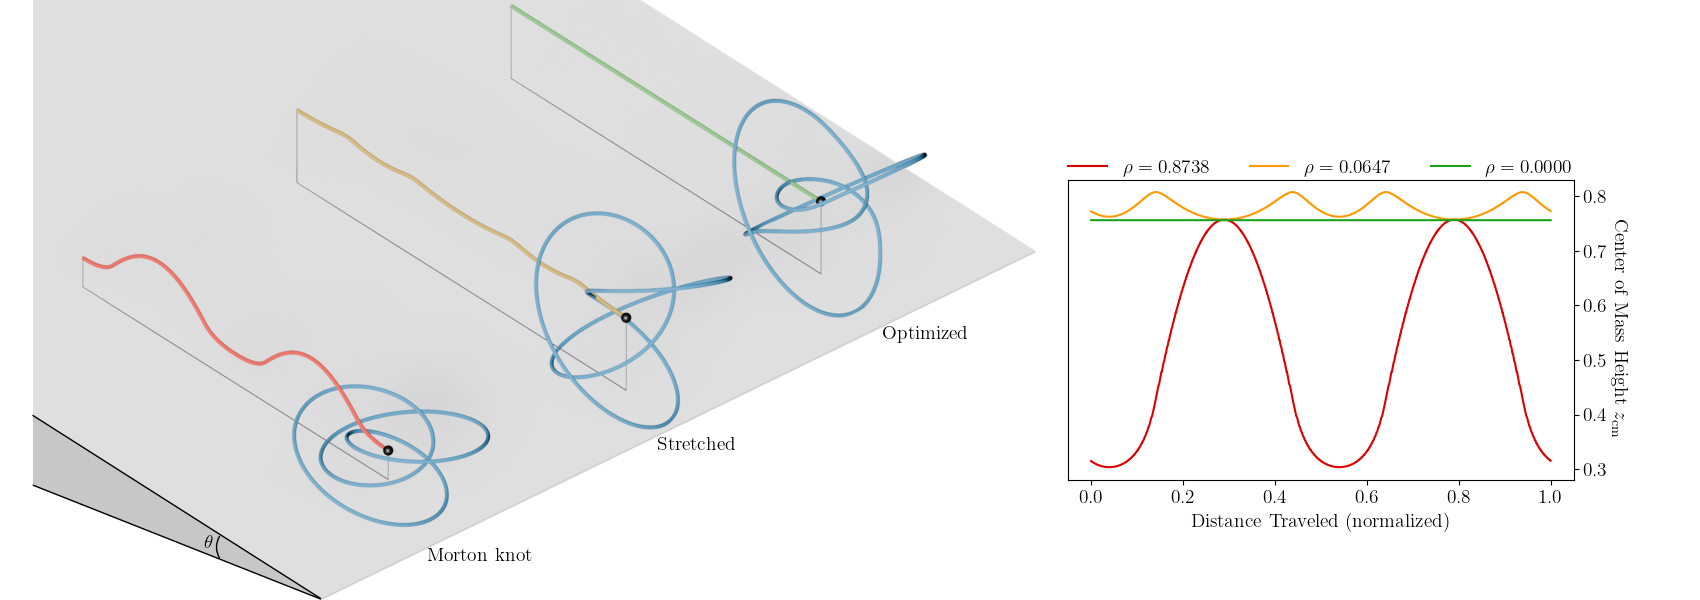

In [20]:
plt.close('all')

w = 1.69
tw = w+1

fig, axs = plt.subplots(1,2, figsize=(17, 6), subplot_kw={}, gridspec_kw={'width_ratios': [w, 1], 'bottom': 0, 'right': 1, 'top': 1, 'left': 0, 'wspace': -0})

ax1, ax2 = axs
ax1.imshow(img)

ax1.axis('off')
# ax1.set_xlim(130, 1825)
ax1.set_xlim(0, 1805)

# adjust height of ax1
box = ax1.get_position()
# box.y0 = 0.01
# box.y1 = 1
ax1.set_position(box)

fontsize = 14

dx = 0.015
dy = 0.06
ax1.annotate('Morton knot', (0.267+dx, 0.005+dy), xycoords='figure fraction', ha='center', fontsize=fontsize)
ax1.annotate('Stretched', (0.395+dx, 0.19+dy), xycoords='figure fraction', ha='center', fontsize=fontsize)
ax1.annotate('Optimized', (0.53+dx, 0.375+dy), xycoords='figure fraction', ha='center', fontsize=fontsize)

xzcm = 0.15
yzcm = 0.75
# ax1.annotate("$z_{\\mathrm{cm}}$", (xzcm, yzcm), xycoords='figure fraction', fontsize=fontsize)
# vertical arrow
# ax1.annotate("", xy=(xzcm+0.02, yzcm-0.064), xytext=(xzcm+0.02, yzcm+0.075), xycoords='figure fraction', arrowprops=dict(arrowstyle="<|-|>", lw=0.5, color='black'))

x = [np.linspace(0, 1, len(heights[i])) for i in range(3)]
color = np.array((220,0,0))/255
ax2.plot(x[0], heights[0], label=f'$\\rho={rhos[0]:.4f}$', color=color)
ax2.plot(x[1], heights[1], label=f'$\\rho={rhos[1]:.4f}$', color=color2)
ax2.plot(x[2], heights[2], label=f'$\\rho={rhos[2]:.4f}$', color=color3)

ax2.set_ylim(0.28,0.83)

# adjust height of ax2
box = ax2.get_position()
box.y0 = 0.20
box.y1 = 0.7
box.x0 = w/tw
box.x1 = (tw-0.2)/tw
ax2.set_position(box)

ax2.set_xlabel('Distance Traveled (normalized)')
ax2.set_ylabel('Center of Mass Height $z_{\\mathrm{cm}}$', rotation=270, labelpad=15)

# legend_elements = [plt.Line2D([0], [0], color=color, label=    f'Morton knot'),
#                    plt.Line2D([0], [0], color=color2, label=   f'Stretched'),
#                    plt.Line2D([0], [0], color=color3, label=    f'Projected')]

# put y axis on the right
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

legend_elements = [plt.Line2D([0], [0], color=color, label=    f'$\\rho={rhos[0]:.4f}$'),
                   plt.Line2D([0], [0], color=color2, label=   f'$\\rho={rhos[1]:.4f}$'),
                   plt.Line2D([0], [0], color=color3, label=    f'$\\rho={rhos[2]:.4f}$')]

ax2.legend(handles=legend_elements, loc="center", frameon=False, ncols=3, bbox_to_anchor=(0.5, 1.04))

# add arc to indicate angle
ax1.annotate("", (0.13, 0.066), (0.13, 0.11), xycoords="figure fraction", arrowprops=dict(arrowstyle="-", lw=1, color='black', connectionstyle=f"arc3,rad={np.radians(20)}"))
ax1.annotate(r"$\theta$", (0.12, 0.086), xycoords="figure fraction")

ax1.annotate("", (0.018, 0.31), (0.19, 0), xycoords="figure fraction", arrowprops=dict(arrowstyle="-", lw=1, color='black'))
ax1.annotate("", (0.018, 0.193), (0.19, 0), xycoords="figure fraction", arrowprops=dict(arrowstyle="-", lw=1, color='black'))

# set margins

plt.savefig((f'../data/figures/figure_1_heights.pdf'), dpi=300)




# Figure 2

In [21]:
# load data
path = '../data/blender_plots'
a = 0.75
a_str = first_nonzero_digits(a)
fig_2_name = lambda x: plot_name(2, f'{a_str}_3_{x}')
names = [fig_2_name('base_knot'), fig_2_name('stretched_knot'), fig_2_name('projected_knot'), fig_2_name('knot_hull'), fig_2_name('tdr_hull')]
paths = [f'{path}/{name}' for name in names]
imgs = [plt.imread(path) for path in paths]

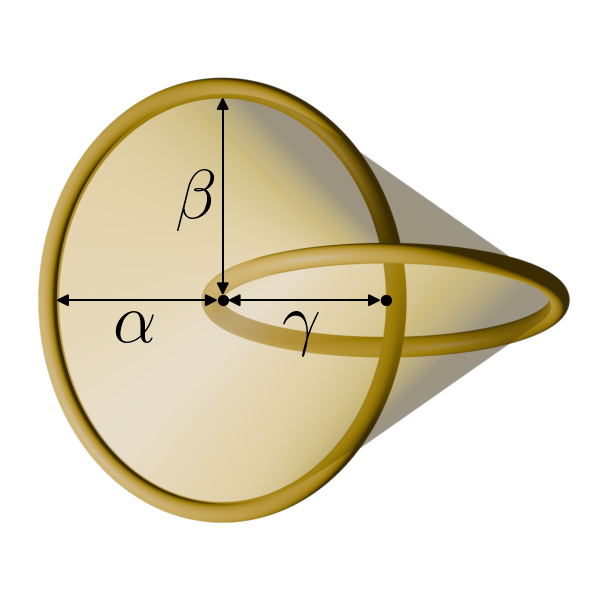

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(imgs[4])
axs.axis('off')
axs.set_xlim(300, 1600)

gamma1 = [770, 540]
gamma2 = [1150, 540]

def plot_double_sided_arrow(pts, dx, dy):
    head_width = 25
    head_length = 25
    pts[0] -= [dx, dy]
    pts[1] += [dx, dy]
    axs.arrow(*pts[0], *(pts[1] - pts[0]), head_width=head_width, head_length=head_length, fc='black', ec='black')
    axs.arrow(*pts[1], *(pts[0] - pts[1]), head_width=head_width, head_length=head_length, fc='black', ec='black')
    # x, y = pts[1]
    # dx, dy = pts[0] - pts[1]
    # axs.arrow(x, y, dx, dy, head_width=head_width, head_length=head_length, fc='black', ec='black')

pts = np.array([gamma1, gamma2])
axs.scatter(pts[:, 0], pts[:, 1], c='black', s=50)

plot_double_sided_arrow(pts, -40, 0)

alpha = [370, 540]
pts = np.array([alpha, gamma1])
plot_double_sided_arrow(pts, -40, 0)

beta = [770, 55]
pts = np.array([beta, gamma1])
plot_double_sided_arrow(pts, 0, -40)

fontsize = 50
dy = 50
axs.text(0.5*(gamma1[0] + gamma2[0])-fontsize, gamma1[1] + fontsize + dy, "$\gamma$", fontsize=fontsize, color='black')
axs.text(0.5*(alpha[0] + gamma1[0])-fontsize, alpha[1] + fontsize + dy, "$\\alpha$", fontsize=fontsize, color='black')
axs.text(beta[0]-fontsize-60, 0.5*(beta[1] + gamma1[1]) + dy, "$\\beta$", fontsize=fontsize, color='black')

plt.tight_layout()
plt.savefig(f'../data/figures/figure_2_method_tdr_hull.png', bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

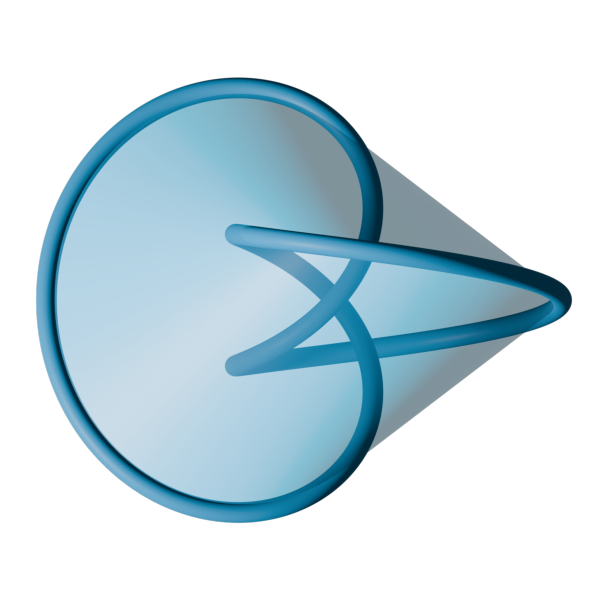

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(imgs[3])
axs.axis('off')
axs.set_xlim(300, 1600)

plt.tight_layout()
plt.savefig(f'../data/figures/figure_2_method_knot_hull.png', bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

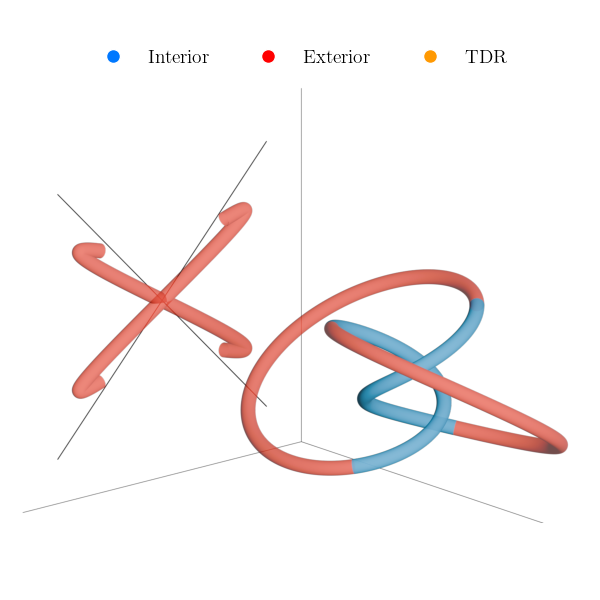

In [24]:
# Setup
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(imgs[0])
axs.axis('off')
axs.set_xlim(300, 1650)

from src.figures_src.figures import color1, color2, color3

blue = color1[:3]
yellow = color3[:3]

# add legend for interior, exterior and TDR
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Interior', markerfacecolor=color1, markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Exterior', markerfacecolor='r', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='TDR', markerfacecolor=color2, markersize=10)]
axs.legend(handles=legend_elements, loc='upper center', ncols=3, frameon=False, bbox_to_anchor=(0.5, 1.1))

plt.tight_layout()
plt.savefig(f'../data/figures/figure_2_method_1.pdf', bbox_inches='tight', pad_inches=0, transparent=True, dpi = 300)

/var/folders/c6/1h7_rfdx0vbd_7tnjr_c9pb80000gn/T/ipykernel_10381/3950190613.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


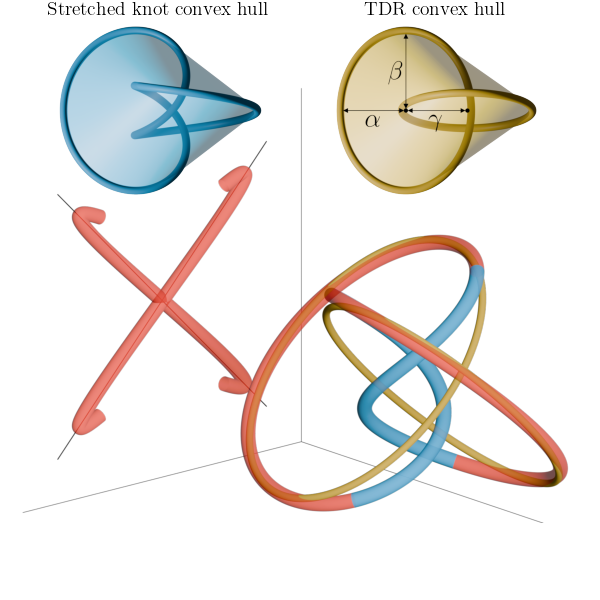

In [25]:
# Setup
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(imgs[1])
axs.axis('off')
axs.set_xlim(300, 1650)

knot_img = plt.imread(f'../data/figures/{plot_name(2, "method_knot_hull")}')
tdr_img = plt.imread(f'../data/figures/{plot_name(2, "method_tdr_hull")}')

# annotate images 
dx = 0.15
wx = 0.3

knot_ax = fig.add_axes([0.09, 0.67, 0.35, 0.35], anchor='SW')
knot_ax.imshow(knot_img)
knot_ax.axis('off')
knot_ax.set_xticks([])
knot_ax.set_yticks([])
knot_ax.set_title("Stretched knot convex hull", fontsize='medium')

tdr_ax = fig.add_axes([1-dx-wx, 0.67, 0.35, 0.35], anchor='SW')
# tdr_ax = fig.add_axes([1-dx-0.45, 0.62, 0.45, 0.45], anchor='SW')
tdr_ax.imshow(tdr_img)
tdr_ax.axis('off')
tdr_ax.set_xticks([])
tdr_ax.set_yticks([])
tdr_ax.set_title("TDR convex hull", fontsize='medium')

plt.tight_layout()
plt.savefig(f'../data/figures/figure_2_method_2.pdf', bbox_inches='tight', pad_inches=0.02, dpi=300, transparent=True)

## Smooth vs. Non-smooth

In [26]:
path = "../data/blender_plots/figure_2_75_3_smooth_vs_rough.png"
img = plt.imread(path)

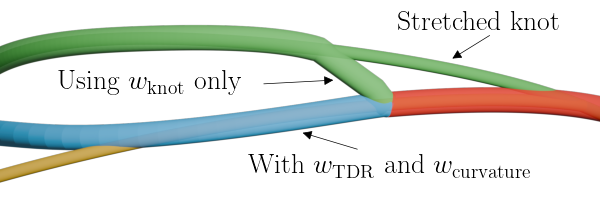

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 2), gridspec_kw={'bottom': 0, 'right': 1, 'top': 1, 'left': 0})
ax.imshow(img)

ax.axis('off') 
ax.set_ylim(810, 250)
ax.set_yticks([])
ax.set_xticks([])

size = 20
ax.annotate(r"Using $w_\mathrm{knot}$ only", (0.25, 0.55), xycoords='figure fraction', ha='center', fontsize=size)
ax.annotate("", xy=(0.435, 0.58), xytext=(0.56, 0.6), xycoords='figure fraction', arrowprops=dict(arrowstyle="<|-", lw=0.5, color='black'))

ax.annotate(r"With $w_\mathrm{TDR}$ and $w_\mathrm{curvature}$", (0.65, 0.13), xycoords='figure fraction', ha='center', fontsize=size)
ax.annotate("", xy=(0.6, 0.25), xytext=(0.5, 0.34), xycoords='figure fraction', arrowprops=dict(arrowstyle="<|-", lw=0.5, color='black'))

ax.annotate(r"Stretched knot", (0.8, 0.85), xycoords='figure fraction', ha='center', fontsize=size)
ax.annotate("", xy=(0.82, 0.83), xytext=(0.75, 0.7), xycoords='figure fraction', arrowprops=dict(arrowstyle="<|-", lw=0.5, color='black'))

# legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Stretched knot', markerfacecolor="green", markersize=10)]
# ax.legend(handles=legend_elements, loc='upper right', frameon=False)

plt.savefig(f'../data/figures/figure_2_smooth_vs_rough.png', pad_inches=0, dpi=300, transparent=True)


In [28]:
name = "../data/figures/figure_2_smooth_vs_rough.png"
img1 = plt.imread(name)

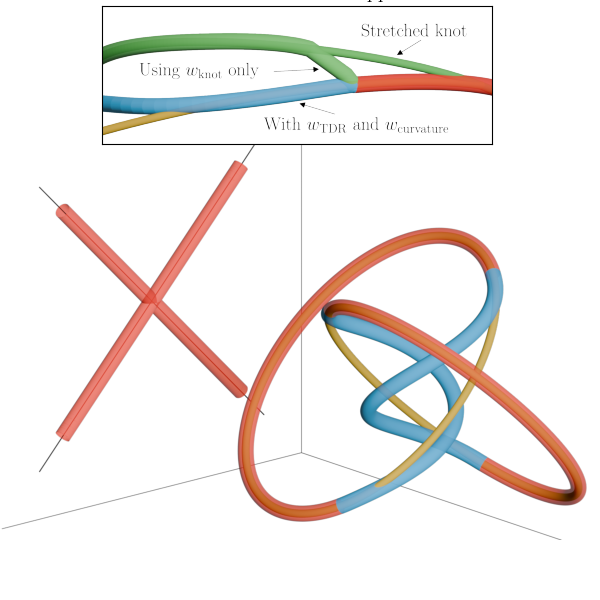

In [29]:
# Setup
fig, axs = plt.subplots(1, 1, figsize=(6, 6), gridspec_kw={'bottom': 0, 'right': 1, 'top': 1, 'left': 0})
axs.imshow(imgs[2])
axs.axis('off')
axs.set_xlim(300, 1650)

inset_ax = fig.add_axes([0.17, 0.76, 0.65, 0.44], anchor='SW')
# inset_ax = fig.add_axes([0.30, 0.74, 0.65, 0.44], anchor='SW')
# height of ax
inset_ax.imshow(img1)
# inset_ax.axis('off')
inset_ax.set_xticks([])
inset_ax.set_yticks([])
inset_ax.set_ylim(585, -50)
# inset_ax.spines['top'].set_visible(False)
# inset_ax.spines['right'].set_visible(False)
# inset_ax.spines['bottom'].set_visible(False)
# inset_ax.spines['left'].set_visible(False)
inset_ax.set_title("Curve Smoothness vs. Knot Approximation", fontsize='medium')

# annotate line
dx = 0.15
wx = 0.3

# axs.annotate("", xy=(0.295, 0.73), xytext=(0.825, 0.55), xycoords='figure fraction', arrowprops=dict(arrowstyle="-", lw=0.5, color='black'))
# axs.annotate("", xy=(0.29+0.664, 0.7344), xytext=(0.825 - 0.005, 0.55 - 0.001), xycoords='figure fraction', arrowprops=dict(arrowstyle="-", lw=0.5, color='black'))
# axs.annotate("", xy=(0.29+0.664-0.1, 0.7344), xytext=(0.825 - 0.005, 0.55 - 0.001), xycoords='figure fraction', arrowprops=dict(arrowstyle="-", lw=0.5, color='black'))
# axs.annotate("", xy=(0.295+0.16, 0.735), xytext=(0.825, 0.55), xycoords='figure fraction', arrowprops=dict(arrowstyle="-", lw=0.5, color='black'))

# plt.tight_layout()
plt.savefig(f'../data/figures/figure_2_method_3.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

# Figure 3

In [35]:
a_list = [0.3, 0.5, 0.9, 0.5, 0.5, 0.5]
p_list = [3, 3, 3, 5, 7, 9]

plot_folder = f"../data/blender_plots/"
plot_name = lambda i, x: f"figure_{i}_{x}.png"
plot_names = lambda a, p: [plot_name(3, f'{first_nonzero_digits(a)}_{p}_{x}') for x in ['base', 'stretched', 'projected']]
plots = [[plt.imread(f"{plot_folder}{plot_name}") for plot_name in plot_names(a,p)] for a,p in zip(a_list, p_list)]

In [36]:
# load knots
names = [
    "KNOT_a_3_p_3_n_2k_wtdr_1.00e-02_wcurv_1.00e+02_projected",
    "KNOT_a_5_p_3_n_1k_wtdr_7.00e-02_wcurv_1.00e+03_projected",
    "KNOT_a_9_p_3_n_1k_wtdr_7.00e-02_wcurv_1.00e+03_tdr2",
    "KNOT_a_5_p_5_n_1k_wtdr_1.00e+01_wcurv_1.00e+05_tdr2",
    "KNOT_a_5_p_7_n_2k_wtdr_1.00e+01_wcurv_2.70e+05_tdr2",
    "KNOT_a_5_p_9_n_3k_wtdr_1.00e+01_wcurv_4.50e+03_tdr2"
]

kos = [KnotOpti.parse_name(name) for name in names]
knots = [[ko.load("base"), ko.load("stretched"), ko.load("projected")] for ko in kos]
rhos = [[rolliness(k)[0] for k in knot] for knot in knots]

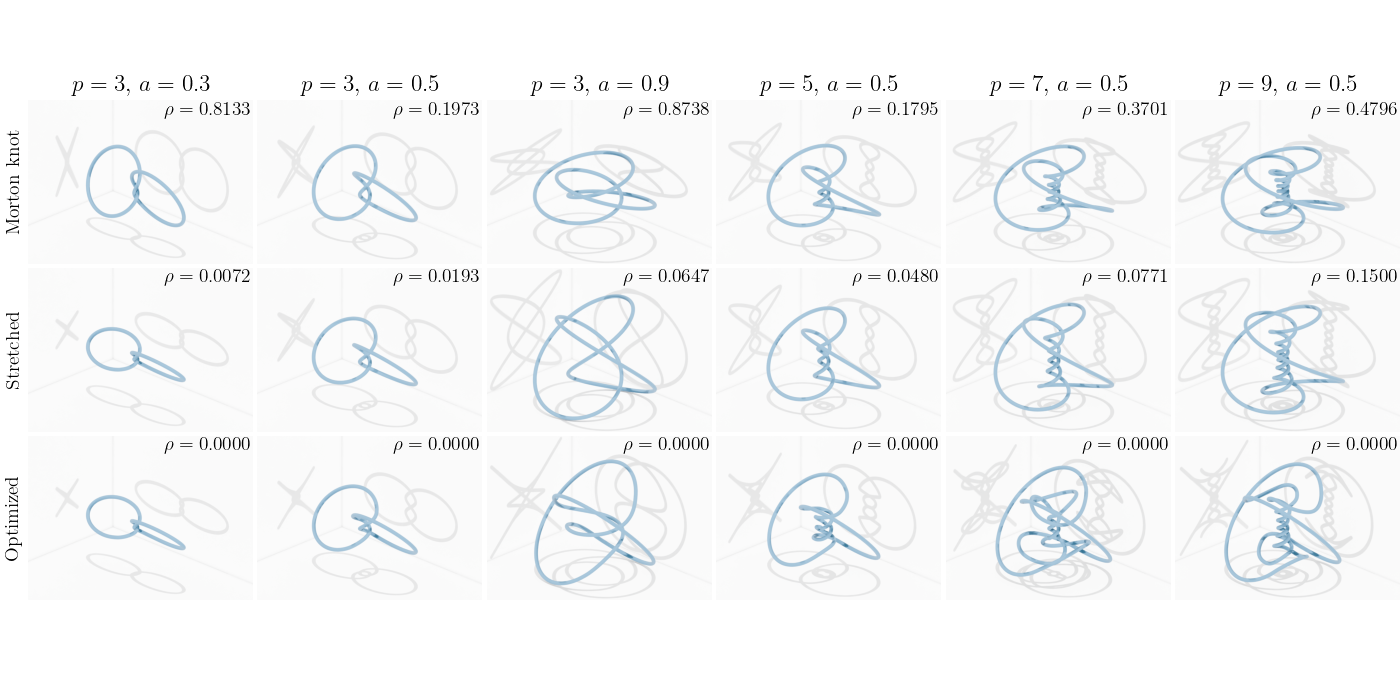

In [37]:
# Create subplots
plt.close('all')

# three subfigures for each column of 4 rows
# fig, axs = plt.subplots(4, 3, figsize=(14, 14), gridspec_kw={'wspace': 0, 'hspace': 0, 'left': 0.1, 'right': 1, 'top': 1, 'bottom': 0})
# fig, axs = plt.subplots(3, 6, figsize=(14, 7), gridspec_kw={'wspace': 0, 'hspace': -0.7, 'wspace': -0.2, 'left': 0.15, 'right': 1, 'top': 1, 'bottom': 0})
fig, axs = plt.subplots(3, 6, figsize=(14, 7), gridspec_kw={'wspace': 0, 'hspace': -0.54, 'wspace': 0.02, 'left': 0.02, 'right': 1, 'top': 1, 'bottom': 0})
# axs = axs.T
plt.rcParams.update({'font.size': 14, 'text.usetex': True, 'font.family': 'serif'})

# col_titles = ['Base knot', 'TDR optimization', 'Projection']
row_titles = ['Morton knot', 'Stretched', "Optimized"]
col_titles = [fr'$p={p}$, $a={a}$' for a, p in zip(a_list, p_list)]

for ax in axs.flatten(): 
    # ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlim(250, 1730)
    # ax.set_ylim(1050, 10)

def annotate_rho(ax, rho):
    ax.text(0.8, 0.94, f'$\\rho={rho:.4f}$', ha='center', va='center', transform=ax.transAxes, fontsize=14)

for i, (a, p) in enumerate(zip(a_list, p_list)):
    for ax, r, img in zip(axs[:,i], rhos[i], plots[i]):
        ax.imshow(img)
        annotate_rho(ax, r)

# column titles
# Add column titles
for ax, col in zip(axs[0], col_titles):
    ax.set_title(col, size='large')

# Add row titles
for ax, row in zip(axs[:,0], row_titles):
    # ax.set_ylabel(row, rotation=0, size='large', labelpad=60, ha='left')
    ax.set_ylabel(row)

plt.savefig('../data/figures/figure_3_and_4.pdf', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)

